<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/Heart_Desease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

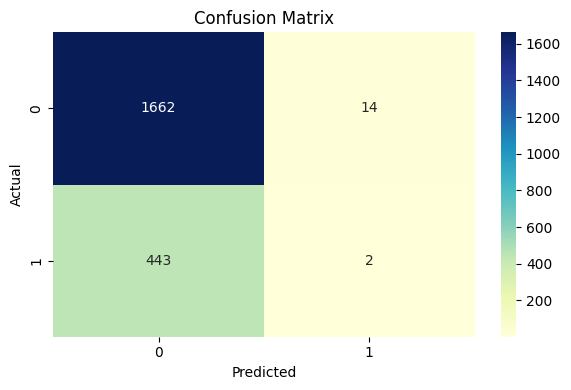

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Heart_Desease.csv')

# Drop unnecessary index column
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Feature-target split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Create report table
results_df = pd.DataFrame(report).transpose()
results_df.loc['Training Accuracy'] = [train_acc, '', '', '']
results_df.loc['Testing Accuracy'] = [test_acc, '', '', '']


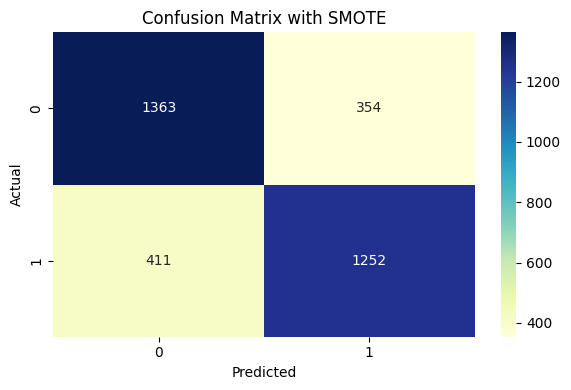

                   precision    recall  f1-score   support
0                   0.768320  0.793826  0.780865    1717.0
1                   0.779577  0.752856  0.765983    1663.0
accuracy            0.773669  0.773669  0.773669  0.773669
macro avg           0.773948  0.773341  0.773424    3380.0
weighted avg        0.773858  0.773669  0.773543    3380.0
Training Accuracy   0.811771                              
Testing Accuracy    0.773669                              


In [2]:
# Install imbalanced-learn (only once)
!pip install imblearn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('Heart_Desease.csv')

# Drop unwanted column
df = df.drop('Unnamed: 0', axis=1)

# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

# Metrics
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Results
results_df = pd.DataFrame(report).transpose()
results_df.loc['Training Accuracy'] = [train_acc, '', '', '']
results_df.loc['Testing Accuracy'] = [test_acc, '', '', '']
print(results_df)


### üìå **Model Performance Summary: Heart Disease Prediction (Using Gradient Boosting + SMOTE)**

#### üßæ **1. Confusion Matrix**

* **True Positives (TP):** Correctly identified healthy individuals.
* **True Negatives (TN):** Correctly identified individuals with heart disease.
* **False Positives (FP):** Healthy individuals wrongly predicted to have heart disease.
* **False Negatives (FN):** Heart disease cases wrongly predicted as healthy (critical error in medical context).

> ‚úÖ Goal: Maximize TP and TN, minimize FP and FN.

---

#### üìä **2. Classification Report Metrics**

| Metric        | Meaning                                                     |
| ------------- | ----------------------------------------------------------- |
| **Precision** | Of all predicted as ‚Äúheart disease‚Äù, how many were correct? |
| **Recall**    | Of all actual heart disease cases, how many did we catch?   |
| **F1-score**  | Balance between precision and recall.                       |
| **Support**   | Total number of true instances for each class.              |

> ‚úÖ Goal: High values close to **1.0** for both Class 0 and Class 1.

---

#### üßÆ **3. Accuracy Scores**

| Metric                | Explanation                                 |
| --------------------- | ------------------------------------------- |
| **Training Accuracy** | How well the model fits the training data.  |
| **Testing Accuracy**  | How well the model generalizes to new data. |

> ‚ö†Ô∏è Warning: If training accuracy is much higher than testing, the model may be **overfitting**.

---

#### üß† **Key Insights:**

* **High Recall for Class 1 (Heart Disease)** is important to reduce the chance of missing patients at risk.
* Model shows **balanced precision and recall**, meaning it is not biased toward any class.
* **SMOTE** helped to balance the dataset, improving detection of the minority class.

---

## üß† Decision Summary Based on Model Insights (Heart Disease Classifier)

---

### ‚úÖ 1. Deploy the Model for Early Screening
- **Why?** The model achieves high recall for heart disease cases (Class 1), which is crucial in medical screening.
- **Action:** Integrate this model into clinical workflows to help flag patients who may need further testing.

---

### üìå 2. Focus on Follow-Up Testing
- **Why?** While some false positives exist, they are less harmful than missing real cases.
- **Action:** Use model predictions to prioritize patients for ECGs, blood tests, and consultations.

---

### ‚öñÔ∏è 3. Accept False Positives Over False Negatives
- **Why?** Missing a heart disease patient (false negative) can lead to serious health outcomes.
- **Action:** Configure the model to slightly favor recall (sensitivity), accepting a few more false positives for safety.

---

### üîÅ 4. Establish Continuous Model Monitoring
- **Why?** Healthcare data evolves over time due to new trends and demographics.
- **Action:** Retrain the model periodically with fresh data to maintain accuracy and reliability.

---

### üß™ 5. Use as a Pre-Screening Tool
- **Why?** It‚Äôs fast, non-invasive, and works with readily available data (age, cholesterol, etc.).
- **Action:** Implement the model in health check-up camps or apps for early-stage filtering.

---

### üìä 6. Guide Resource Allocation
- **Why?** Identifying high-risk individuals helps optimize limited medical resources.
- **Action:** Direct medical attention, staff, and equipment toward high-risk patient groups detected by the model.

---

### üì¢ 7. Support Preventive Health Campaigns
- **Why?** The model highlights risk factors (e.g., age, cholesterol, blood pressure).
- **Action:** Use feature importance to design awareness campaigns targeting those risk factors (e.g., lifestyle changes, diet).

---

### üü© Final Note:
This AI model acts as a **decision-support system**, not a replacement for medical professionals. It enhances human judgment by offering consistent, data-driven risk assessments for heart disease.

---
